Liquidity Risk

Ïú†ÎèôÏÑ± ÏúÑÌóò(Liquidity Risk)ÎûÄ ÏûêÏÇ∞ÏùÑ ÏãúÏû•ÏóêÏÑú Ïã†ÏÜçÌïòÍ≤å ÏõêÌïòÎäî Í∞ÄÍ≤©ÏúºÎ°ú Îß§Í∞ÅÌïòÍ±∞ÎÇò ÌòÑÍ∏àÌôîÌï† Ïàò ÏóÜÎäî ÏúÑÌóò

## 1. Bid-Ask Spread

In [3]:
# bid-ask spread Í≥ÑÏÇ∞ ÏòàÏãú
bid = 10000
ask = 10100

absolute_spread = ask - bid
relative_spread = (ask - bid) / ((ask + bid) / 2) * 100

print("Ï†àÎåÄ Ïä§ÌîÑÎ†àÎìú:", absolute_spread, "Ïõê")
print("ÏÉÅÎåÄ Ïä§ÌîÑÎ†àÎìú: {:.3f}%".format(relative_spread))


Ï†àÎåÄ Ïä§ÌîÑÎ†àÎìú: 100 Ïõê
ÏÉÅÎåÄ Ïä§ÌîÑÎ†àÎìú: 0.995%


### 1-1 ÏÇºÏÑ±Ï†ÑÏûê: ÏµúÍ∑º 1ÎÖÑ ÏùºÎ≥Ñ bid-ask spread Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî

In [4]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [5]:
df = stock.get_market_ohlcv_by_date(
start.strftime('%Y%m%d'),
end.strftime('%Y%m%d'),
"005930", # ÏÇºÏÑ±Ï†ÑÏûê Ìã∞Ïª§
"d"
)

In [10]:
print("üìå Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº:", df.columns)

üìå Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº: Index(['ÏãúÍ∞Ä', 'Í≥†Í∞Ä', 'Ï†ÄÍ∞Ä', 'Ï¢ÖÍ∞Ä', 'Í±∞ÎûòÎüâ', 'Îì±ÎùΩÎ•†'], dtype='object')


### 1-2 Bid-Ask Spread Í≥ÑÏÇ∞, ÌèâÍ∑† Bid-Ask Spread Ï∂úÎ†•

In [15]:
# pykrxÎäî Bid/Ask Í∞ÄÍ≤©ÏùÑ Ï†úÍ≥µÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú, Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∑ºÏÇ¨ Î∞©Î≤ï ÏÇ¨Ïö©:
# High: Ask Price (Îß§ÎèÑÌò∏Í∞Ä), Low: Bid Price (Îß§ÏàòÌò∏Í∞Ä)Î°ú Í∞ÄÏ†ï
# df['bid_ask_spread'] = (df['Í≥†Í∞Ä'] - df['Ï†ÄÍ∞Ä']) / ((df['Í≥†Í∞Ä'] + df['Ï†ÄÍ∞Ä']) / 2) * 100

In [16]:
df['bid_ask_spread'] = (df['Í≥†Í∞Ä'] - df['Ï†ÄÍ∞Ä']) / ((df['Í≥†Í∞Ä'] + df['Ï†ÄÍ∞Ä']) / 2) * 100

# ÌèâÍ∑† Bid-Ask Spread Ï∂úÎ†•
mean_spread = df['bid_ask_spread'].mean()
print(f"üìä ÏÇºÏÑ±Ï†ÑÏûê ÌèâÍ∑† Bid-Ask Spread (ÏµúÍ∑º 1ÎÖÑ): {mean_spread:.4f}%")

üìä ÏÇºÏÑ±Ï†ÑÏûê ÌèâÍ∑† Bid-Ask Spread (ÏµúÍ∑º 1ÎÖÑ): 2.3202%


### 1-3 ÏãúÍ∞ÅÌôî

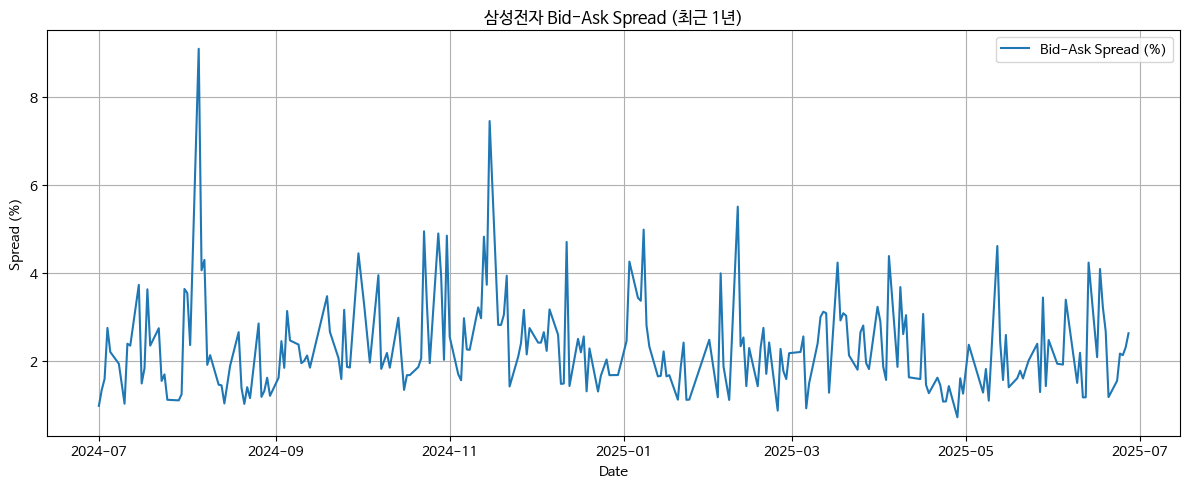

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['bid_ask_spread'], label='Bid-Ask Spread (%)')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê Bid-Ask Spread (ÏµúÍ∑º 1ÎÖÑ)")
plt.ylabel("Spread (%)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2.  Amihud ÎπÑÏú†ÎèôÏÑ± ÏßÄÌëú

In [2]:
# ÌååÏù¥Ïç¨ÏúºÎ°ú Amihud Illiquidity ÏßÄÌëú Í≥ÑÏÇ∞
import pandas as pd

# ÏòàÏãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
df = pd.DataFrame({
    'return': [0.01, -0.02, 0.015, -0.005],
    'volume': [1000000, 800000, 1200000, 900000]
})

# Amihud ÎπÑÏú†ÎèôÏÑ± Í≥ÑÏÇ∞
df['amihud'] = df['return'].abs() / df['volume']
amihud_avg = df['amihud'].mean()

print("Amihud Illiquidity ÌèâÍ∑†:", amihud_avg)


Amihud Illiquidity ÌèâÍ∑†: 1.3263888888888888e-08


In [ ]:
# "ÏàòÏùµÎ•† 1 Îã®ÏúÑ Î≥ÄÌôîÍ∞Ä ÏñºÎßàÎÇò Ï†ÅÏùÄ Í±∞ÎûòÎüâÏóêÎèÑ ÎØºÍ∞êÌïòÍ≤å Î∞úÏÉùÌïòÎäîÏßÄ"Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
# Ïà´ÏûêÍ∞Ä ÏûëÏùÑÏàòÎ°ù Ïú†ÎèôÏÑ±Ïù¥ ÎÜíÍ≥† (Í±∞ÎûòÎüâÏù¥ ÎßéÏïÑÎèÑ Í∞ÄÍ≤© Î≥ÄÎèôÏù¥ ÏûëÏùå), Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Ïú†ÎèôÏÑ±Ïù¥ ÎÇÆÏäµÎãàÎã§.

### 2-2 Amihud Illiquidity Ratio  pykrx ÏÇºÏÑ±Ï†ÑÏûê 

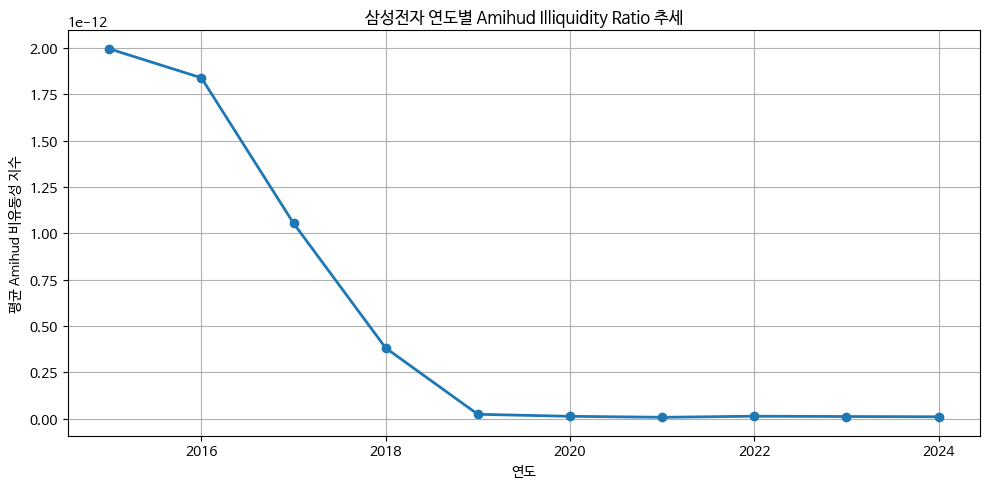

In [20]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎåÄÏÉÅ Ï¢ÖÎ™© (ÏÇºÏÑ±Ï†ÑÏûê)
ticker = "005930"

# 2. Î∂ÑÏÑù Ïó∞ÎèÑ Î≤îÏúÑ ÏÑ§Ï†ï (Ïòà: 2015~2024)
years = list(range(2015, 2025))
amihud_by_year = {}

for year in years:
    start = f"{year}0101"
    end = f"{year}1231"

    # 3. ÏùºÎ≥Ñ ÏãúÏÑ∏ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
    df = stock.get_market_ohlcv_by_date(start, end, ticker, "d")

    if df.empty:
        print(f"{year} Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
        continue

    # 4. ÏàòÏùµÎ•† Î∞è Í±∞ÎûòÎåÄÍ∏à Í≥ÑÏÇ∞
    df['ret'] = df['Ï¢ÖÍ∞Ä'].pct_change()
    df = df.dropna()

    # Í±∞ÎûòÎåÄÍ∏à = Ï¢ÖÍ∞Ä * Í±∞ÎûòÎüâ (Ïõê Îã®ÏúÑ)
    df['amount'] = df['Ï¢ÖÍ∞Ä'] * df['Í±∞ÎûòÎüâ']

    # 5. Amihud ÏßÄÏàò Í≥ÑÏÇ∞
    df['amihud'] = df['ret'].abs() / df['amount']

    # 6. Ìï¥Îãπ Ïó∞ÎèÑ ÌèâÍ∑† Amihud Ï†ÄÏû•
    amihud_by_year[year] = df['amihud'].mean()

# 7. Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
amihud_df = pd.DataFrame.from_dict(amihud_by_year, orient='index', columns=['amihud'])
amihud_df.index.name = "Year"
amihud_df.reset_index(inplace=True)

# 8. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(amihud_df['Year'], amihud_df['amihud'], marker='o', linewidth=2)
plt.title("ÏÇºÏÑ±Ï†ÑÏûê Ïó∞ÎèÑÎ≥Ñ Amihud Illiquidity Ratio Ï∂îÏÑ∏")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÌèâÍ∑† Amihud ÎπÑÏú†ÎèôÏÑ± ÏßÄÏàò")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2-4 ÏÇºÏÑ±Ï†ÑÏûê(005930)ÏôÄ SKÌïòÏù¥ÎãâÏä§(000660)Ïùò Ïó∞ÎèÑÎ≥Ñ Amihud Illiquidity Ratio ÌèâÍ∑†

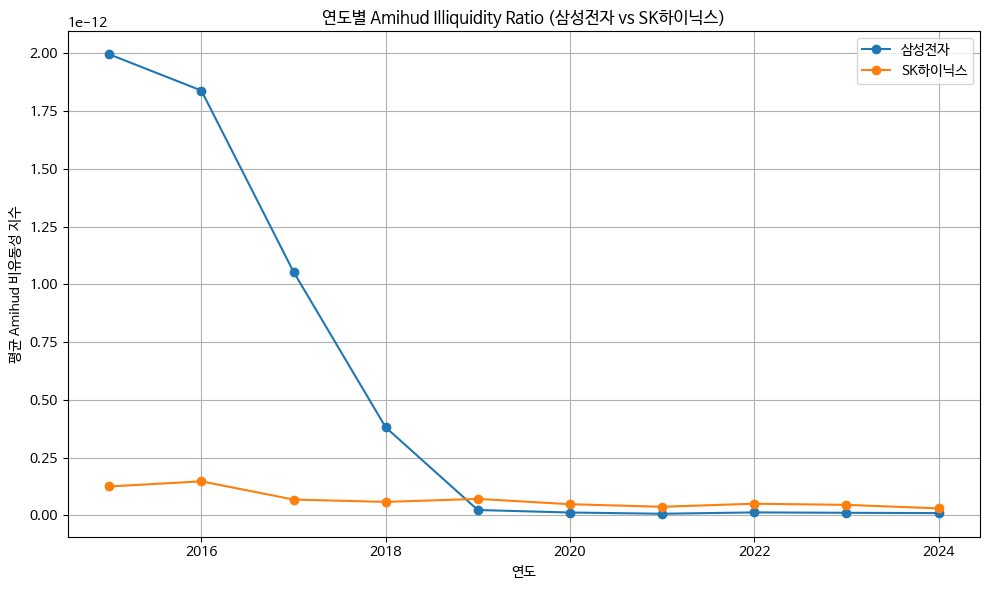

In [21]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎπÑÍµê ÎåÄÏÉÅ Ï¢ÖÎ™© (Ïù¥Î¶Ñ: Ìã∞Ïª§)
tickers = {
    'ÏÇºÏÑ±Ï†ÑÏûê': '005930',
    'SKÌïòÏù¥ÎãâÏä§': '000660'
}

# 2. Ïó∞ÎèÑ Î≤îÏúÑ ÏÑ§Ï†ï
years = list(range(2015, 2025))
results = {}

# 3. Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïó∞ÎèÑÎ≥Ñ Amihud Í≥ÑÏÇ∞
for name, code in tickers.items():
    amihud_by_year = {}
    for year in years:
        start = f"{year}0101"
        end = f"{year}1231"
        
        df = stock.get_market_ohlcv_by_date(start, end, code, "d")
        if df.empty:
            print(f"{name} - {year} Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
            continue
        
        df['ret'] = df['Ï¢ÖÍ∞Ä'].pct_change()
        df = df.dropna()
        df['amount'] = df['Ï¢ÖÍ∞Ä'] * df['Í±∞ÎûòÎüâ']
        df['amihud'] = df['ret'].abs() / df['amount']
        amihud_by_year[year] = df['amihud'].mean()
    
    # Ï¢ÖÎ™©Î≥Ñ Í≤∞Í≥º Ï†ÄÏû•
    results[name] = amihud_by_year

# 4. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
df_amihud = pd.DataFrame(results)
df_amihud.index.name = 'Year'
df_amihud = df_amihud.reset_index()

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
for name in tickers.keys():
    plt.plot(df_amihud['Year'], df_amihud[name], marker='o', label=name)

plt.title("Ïó∞ÎèÑÎ≥Ñ Amihud Illiquidity Ratio (ÏÇºÏÑ±Ï†ÑÏûê vs SKÌïòÏù¥ÎãâÏä§)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÌèâÍ∑† Amihud ÎπÑÏú†ÎèôÏÑ± ÏßÄÏàò")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ÏÇºÏÑ±Ï†ÑÏûê vs SKÌïòÏù¥ÎãâÏä§)Ïùò Ïó∞ÎèÑÎ≥Ñ Amihud Illiquidity Ratio Ï∂îÏÑ∏ Í∑∏ÎûòÌîÑÎ•º Î°úÍ∑∏Ïä§ÏºÄÏùº(log-scale)Î°ú ÏãúÍ∞ÅÌôî

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

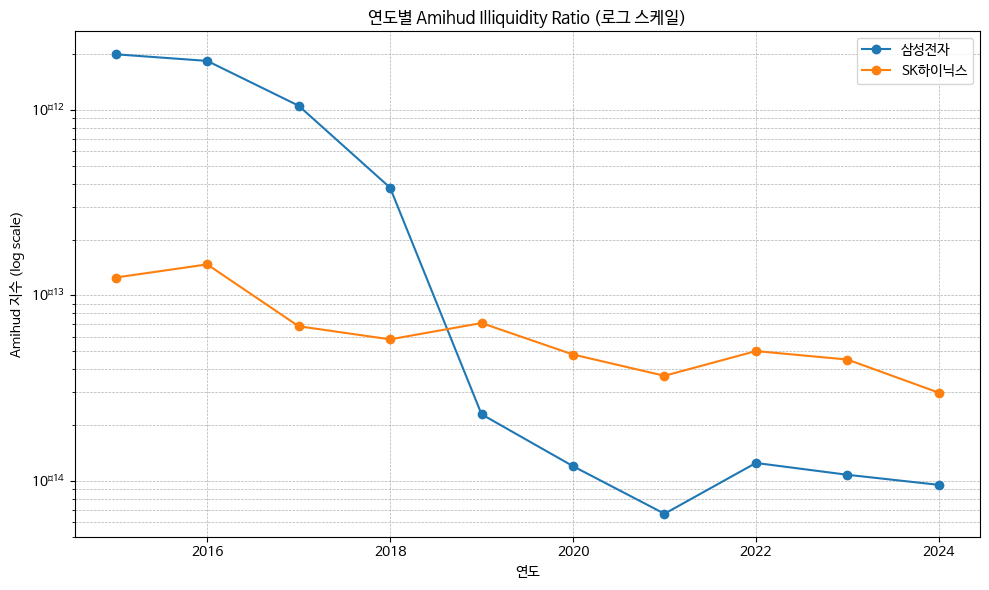

In [22]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ï¢ÖÎ™© ÏÑ§Ï†ï
tickers = {
    'ÏÇºÏÑ±Ï†ÑÏûê': '005930',
    'SKÌïòÏù¥ÎãâÏä§': '000660'
}

# 2. Ïó∞ÎèÑ ÏÑ§Ï†ï
years = list(range(2015, 2025))
results = {}

# 3. Í∞Å Ï¢ÖÎ™©Ïóê ÎåÄÌï¥ Ïó∞ÎèÑÎ≥Ñ Amihud Í≥ÑÏÇ∞
for name, code in tickers.items():
    amihud_by_year = {}
    for year in years:
        start = f"{year}0101"
        end = f"{year}1231"

        df = stock.get_market_ohlcv_by_date(start, end, code, "d")
        if df.empty:
            print(f"{name} - {year} Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
            continue

        df['ret'] = df['Ï¢ÖÍ∞Ä'].pct_change()
        df = df.dropna()
        df['amount'] = df['Ï¢ÖÍ∞Ä'] * df['Í±∞ÎûòÎüâ']
        df['amihud'] = df['ret'].abs() / df['amount']
        amihud_by_year[year] = df['amihud'].mean()
    
    results[name] = amihud_by_year

# 4. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
df_amihud = pd.DataFrame(results)
df_amihud.index.name = 'Year'
df_amihud = df_amihud.reset_index()

# 5. Î°úÍ∑∏ Ïä§ÏºÄÏùº Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
for name in tickers.keys():
    plt.plot(df_amihud['Year'], df_amihud[name], marker='o', label=name)

plt.yscale('log')  # Î°úÍ∑∏ Ïä§ÏºÄÏùº Ï†ÅÏö©
plt.title("Ïó∞ÎèÑÎ≥Ñ Amihud Illiquidity Ratio (Î°úÍ∑∏ Ïä§ÏºÄÏùº)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("Amihud ÏßÄÏàò (log scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 3. Roll's Spread Estimate

ÏãúÏû•Ïùò Ïú†ÎèôÏÑ±(ÌäπÌûà ÎπÑÍ∞ÄÏãúÏ†ÅÏù∏ Í±∞Îûò ÎπÑÏö©)ÏùÑ Ï∂îÏ†ïÌïòÎäî ÎåÄÌëúÏ†ÅÏù∏ Í∞ÑÏ†ëÏ†Å Ïú†ÎèôÏÑ± ÏßÄÌëú

In [24]:
import numpy as np
import pandas as pd

# 1. ÏòàÏãú Ï¢ÖÍ∞Ä ÏãúÍ≥ÑÏó¥ (ÏûêÏú†Î°≠Í≤å Î≥ÄÍ≤Ω Í∞ÄÎä•)
prices = pd.Series([100, 100.5, 100.0, 100.4, 100.1, 100.3])

# 2. ÏàòÏùµÎ•† (Ï¢ÖÍ∞Ä Ï∞®Ïù¥)
returns = prices.diff().dropna()

# 3. ÏãúÏ∞® 1 ÏûêÍ∏∞Í≥µÎ∂ÑÏÇ∞ Í≥ÑÏÇ∞
cov = returns[:-1].cov(returns[1:])

# 4. Roll Ïä§ÌîÑÎ†àÎìú Í≥ÑÏÇ∞
if cov < 0:
    roll_spread = 2 * np.sqrt(-cov)
    print(f"Roll Spread Estimate: {roll_spread:.4f}")
else:
    print("Ïñë(+)Ïùò Í≥µÎ∂ÑÏÇ∞ ‚Üí Roll Spread Ï∂îÏ†ï Î∂àÍ∞Ä")


Ïñë(+)Ïùò Í≥µÎ∂ÑÏÇ∞ ‚Üí Roll Spread Ï∂îÏ†ï Î∂àÍ∞Ä


### 3-2 . ÏÇºÏÑ±Ï†ÑÏûê(005930)ÏôÄ SKÌïòÏù¥ÎãâÏä§(000660) : Roll‚Äôs Spread Estimate

In [25]:
from pykrx import stock
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Ï¢ÖÎ™© Î™©Î°ù Î∞è Ìã∞Ïª§
tickers = {
    'ÏÇºÏÑ±Ï†ÑÏûê': '005930',
    'SKÌïòÏù¥ÎãâÏä§': '000660'
}

# 2. Î∂ÑÏÑù Í∏∞Í∞Ñ: ÏµúÍ∑º 1ÎÖÑ
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
start = start_date.strftime('%Y%m%d')
end = end_date.strftime('%Y%m%d')

# 3. Í≤∞Í≥º Ï†ÄÏû• ÎîïÏÖîÎÑàÎ¶¨
roll_results = {}

# 4. Í∞Å Ï¢ÖÎ™©Î≥Ñ Roll Spread Í≥ÑÏÇ∞
for name, code in tickers.items():
    # Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = stock.get_market_ohlcv_by_date(start, end, code, "d")
    if df.empty:
        print(f"{name} - Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
        continue

    close = df['Ï¢ÖÍ∞Ä']
    returns = close.diff().dropna()

    # lag-1 Í≥µÎ∂ÑÏÇ∞ Í≥ÑÏÇ∞
    cov = returns[:-1].cov(returns[1:])

    # Roll Spread Í≥ÑÏÇ∞
    if cov < 0:
        roll_spread = 2 * np.sqrt(-cov)
        roll_results[name] = roll_spread
        print(f"{name} Roll Spread Estimate: {roll_spread:.6f}")
    else:
        roll_results[name] = None
        print(f"{name} Í≥µÎ∂ÑÏÇ∞Ïù¥ ÏñëÏàò ‚Üí Roll Spread Ï∂îÏ†ï Î∂àÍ∞Ä")


ÏÇºÏÑ±Ï†ÑÏûê Í≥µÎ∂ÑÏÇ∞Ïù¥ ÏñëÏàò ‚Üí Roll Spread Ï∂îÏ†ï Î∂àÍ∞Ä
SKÌïòÏù¥ÎãâÏä§ Í≥µÎ∂ÑÏÇ∞Ïù¥ ÏñëÏàò ‚Üí Roll Spread Ï∂îÏ†ï Î∂àÍ∞Ä


## 4. Turnover Ratio

In [33]:
# ÏÇºÏÑ±Ï†ÑÏûêÏùò ÏùºÎ≥Ñ Turnover Ratio (ÌöåÏ†ÑÏú®)ÏùÑ Í≥ÑÏÇ∞ 

# Í±∞ÎûòÎüâ / ÏÉÅÏû•Ï£ºÏãùÏàò

In [34]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. ÏÑ§Ï†ï: Ï¢ÖÎ™©ÏΩîÎìú Î∞è Í∏∞Í∞Ñ
ticker = "005930"  # ÏÇºÏÑ±Ï†ÑÏûê
end = datetime.today()
start = end - timedelta(days=365)  # ÏµúÍ∑º 1ÎÖÑ

# 2. ÏùºÎ≥Ñ ÏãúÏÑ∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_price = stock.get_market_ohlcv_by_date(
    start.strftime('%Y%m%d'),
    end.strftime('%Y%m%d'),
    ticker,
    "d"
)

# 3. ÏÉÅÏû•Ï£ºÏãùÏàò Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_cap = stock.get_market_cap_by_date(
    start.strftime('%Y%m%d'),
    end.strftime('%Y%m%d'),
    ticker
)

# 4. ÌöåÏ†ÑÏú® Í≥ÑÏÇ∞: Í±∞ÎûòÎüâ / ÏÉÅÏû•Ï£ºÏãùÏàò √ó 100 (%)
df = df_price.merge(df_cap[['ÏÉÅÏû•Ï£ºÏãùÏàò']], left_index=True, right_index=True)
df['turnover'] = (df['Í±∞ÎûòÎüâ'] / df['ÏÉÅÏû•Ï£ºÏãùÏàò']) * 100  # % Îã®ÏúÑ

# 5. Í≤∞Í≥º Ï∂úÎ†• (ÎßàÏßÄÎßâ 5Ïùº)
print(df[['Í±∞ÎûòÎüâ', 'ÏÉÅÏû•Ï£ºÏãùÏàò', 'turnover']].tail())

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['turnover'], label='Turnover Ratio (%)', color='blue')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê ÏùºÎ≥Ñ Turnover Ratio (ÌöåÏ†ÑÏú®)")
plt.ylabel("ÌöåÏ†ÑÏú® (%)")
plt.xlabel("ÎÇ†Ïßú")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


                 Í±∞ÎûòÎüâ       ÏÉÅÏû•Ï£ºÏãùÏàò  turnover
ÎÇ†Ïßú                                        
2025-06-23  16551694  5919637922  0.279607
2025-06-24  23737899  5919637922  0.401003
2025-06-25  23933612  5919637922  0.404309
2025-06-26  19402300  5919637922  0.327762
2025-06-27  17235470  5919637922  0.291158
